<a href="https://colab.research.google.com/github/jonesLevin/Machine-Learning/blob/main/Deep_Learning_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to Neural Networks in Tensorflow




In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.9.2'

Creating data to view and fit

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

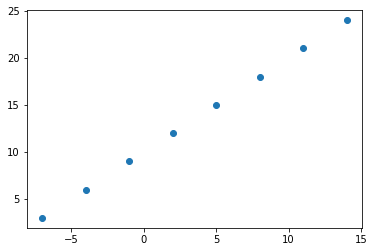

In [6]:
plt.scatter(X, y)

## Input and Output Shapes

In [7]:
X = tf.constant(X)
y = tf.constant(y)

In [8]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modeling with tensorflow
1. Creating the model. Define input and output layers.
2. Compile the model; Define loss funtion, optimizer and evaluation metrix
3. Fitting the model

## Improving our model

In [9]:
X

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>

In [10]:
y

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>

In [11]:
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])

# Fit the model
# Remember to expand dimensions on the input features for tf version 2.7+
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 3s 3s/step - loss: 13.4409 - mae: 13.4409
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8868 - mae: 12.8868
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.3393 - mae: 12.3393
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 11.8005 - mae: 11.8005
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 11.2695 - mae: 11.2695
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.7290 - mae: 10.7290
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1889 - mae: 10.1889
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 9.6536 - mae: 9.6536
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 9.1092 - mae: 9.1092
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 8.5553 - mae: 8.5553
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 7.

In [12]:
model.predict([17.0])

1/1 [==============================] - 0s 85ms/step


array([[26.324875]], dtype=float32)

In [13]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [14]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [15]:
import matplotlib.pyplot as plt

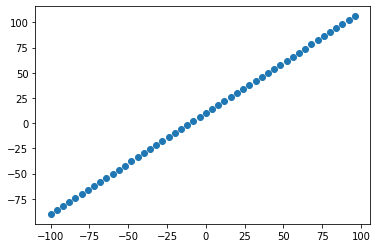

In [16]:
plt.scatter(X, y)

### Splitting the data into train and test sets
* Training set
* Validation set - Tuning is done here
* Test set

In [17]:
# Length of our samples
len(X)

50

In [18]:
# Splitting the data
X_train = X[: 40]
y_train = y[: 40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

## Visualizing the data



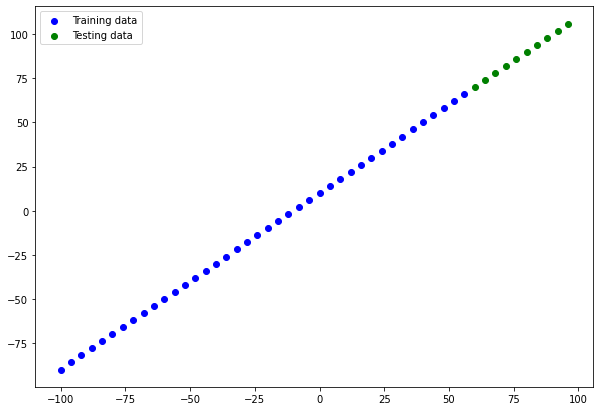

In [19]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')
plt.legend()

In [20]:
# Building the network
# Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model
# model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)


### Visualing the model


In [21]:
tf.random.set_seed(42)

# 1. create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                20        
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Lets fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=0)

In [24]:
from tensorflow.keras.utils import plot_model

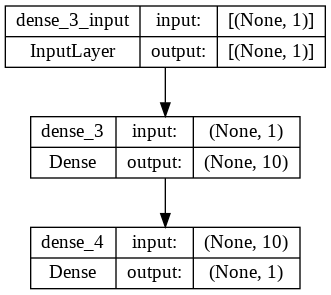

In [25]:
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

In [26]:
# Make predictions
yhat = model.predict(X_test)
yhat

1/1 [==============================] - 0s 40ms/step


array([[ 70.55219 ],
       [ 75.139915],
       [ 79.72764 ],
       [ 84.31536 ],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66626 ],
       [107.253975],
       [111.841705]], dtype=float32)

In [27]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [28]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, pred=yhat):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  plt.scatter(test_data, test_labels, c='g', label='Testing data')
  plt.scatter(test_data, pred, c='r', label='Predictions')
  plt.legend()

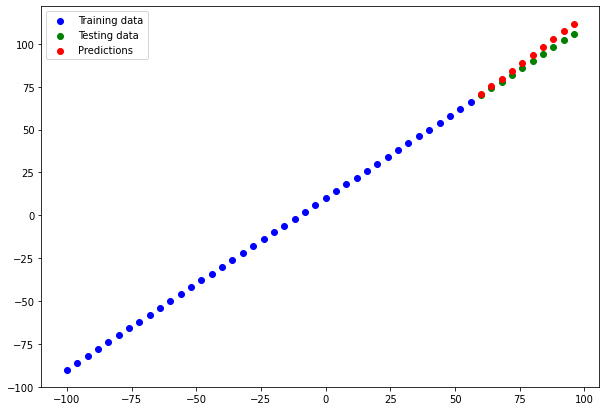

In [29]:
plot_predictions()

### Evaluating our models predictions

In [30]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 122ms/step - loss: 3.1969 - mae: 3.1969


[3.196946620941162, 3.196946620941162]

In [31]:
# Calculate the mean absolute error
mae = tf.keras.losses.MAE(y_test, tf.constant(yhat))

In [32]:
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558247, 14.116051, 11.708944, 10.336927, 10.      , 10.698161,
       12.447118, 15.333008, 19.253975, 23.841705], dtype=float32)>

In [33]:
yhat

array([[ 70.55219 ],
       [ 75.139915],
       [ 79.72764 ],
       [ 84.31536 ],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66626 ],
       [107.253975],
       [111.841705]], dtype=float32)

In [34]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [35]:
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(tf.constant(yhat)))

In [36]:
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>

In [37]:
mse = tf.keras.losses.MSE(y_test, tf.squeeze(tf.constant(yhat)))

In [38]:
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070175>

## Running expreiments to improve our model

In [39]:
# Set random seed
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss='mae',
                optimizer='sgd',
                metrics='mae')

model_1.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - l

In [40]:
y_pred_1 = model_1.predict(X_test)

1/1 [==============================] - 0s 33ms/step


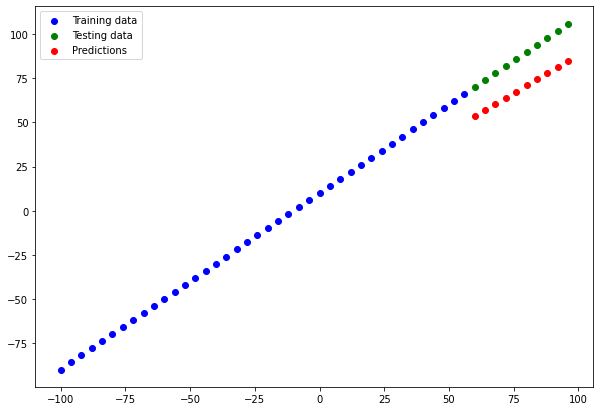

In [41]:
plot_predictions(pred=y_pred_1)

In [42]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss='mae',
                optimizer='sgd',
                metrics='mse')

model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 27.4058 - mse: 1084.1481
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mse: 2586.0081
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 27.8687 - mse: 1094.4379
Epoch 11/100
2/2 [==========================

1/1 [==============================] - 0s 42ms/step


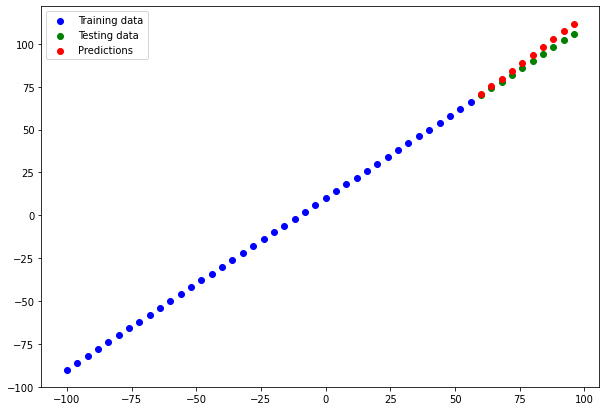

In [43]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(pred=y_pred_2)

## Saving Our Models

In [44]:
model_2.save('best_model_savedModel_format')

In [45]:
# Using HDF5 format
model_2.save('best_model_HDF5_format.h5')

### Loading in a saved model

In [46]:
# Load in the saved model format 
loaded_SavedModel = tf.keras.models.load_model('/content/best_model_savedModel_format')
loaded_SavedModel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [47]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Download a model from colab

In [48]:
from google.colab import files
files.download('/content/best_model_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## A Larger Example

In [49]:
# Import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [51]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [53]:
insurance['male'] = pd.get_dummies(insurance['sex'], drop_first=True)

In [54]:
insurance.drop(['sex'], axis=1, inplace=True)

In [55]:
insurance.head()

,age,bmi,children,smoker,region,charges,male
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1


In [56]:
insurance['smokes'] = pd.get_dummies(insurance['smoker'], drop_first=True)

In [57]:
insurance.drop(['smoker'], axis=1, inplace=True)

In [58]:
insurance.head()

,age,bmi,children,region,charges,male,smokes
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0


In [59]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [60]:
insurance_one_hot = pd.get_dummies(insurance)

In [61]:
insurance_one_hot.head()

,age,bmi,children,charges,male,smokes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0


In [62]:
insurance_one_hot.shape

(1338, 10)

In [63]:
# Splitting X and y 
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [64]:
X.head()

,age,bmi,children,male,smokes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,0,1
1,18,33.770,1,1,0,0,0,1,0
2,28,33.000,3,1,0,0,0,1,0
3,33,22.705,0,1,0,0,1,0,0
4,32,28.880,0,1,0,0,1,0,0


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [67]:
# Building the neural network
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss='mae',
                        optimizer='sgd',
                        metrics='mae')

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 12935.8584 - mae: 12935.8584
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 12091.3203 - mae: 12091.3203
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 11264.5508 - mae: 11264.5508
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 10507.8232 - mae: 10507.8232
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 9859.2256 - mae: 9859.2256
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9310.9619 - mae: 9310.9619
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8837.6113 - mae: 8837.6113
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 8452.1377 - mae: 8452.1377
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 8146.3213 - mae: 8146.3213
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7902.6899 - mae: 7

In [68]:
# Evaluate on test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7003.0239 - mae: 7003.0239


[7003.02392578125, 7003.02392578125]

In [69]:
X_train

,age,bmi,children,male,smokes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,0,0,0,1,0,0
1285,47,24.320,0,0,0,1,0,0,0
1142,52,24.860,0,0,0,0,0,1,0
969,39,34.320,5,0,0,0,0,1,0
486,54,21.470,3,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,0,0,1,0,0,0
1130,39,23.870,5,0,0,0,0,1,0
1294,58,25.175,0,1,0,1,0,0,0
860,37,47.600,2,0,1,0,0,0,1


In [70]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [71]:
# Improving our model
tf.random.set_seed(42)
# 1. Building the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 13273.4609 - mae: 13273.4609
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13105.9922 - mae: 13105.9922
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12755.3672 - mae: 12755.3672
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12072.1514 - mae: 12072.1514
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10937.6523 - mae: 10937.6523
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9492.9502 - mae: 9492.9502
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8160.2803 - mae: 8160.2803
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7511.6372 - mae: 7511.6372
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7403.3970 - mae: 7403.3970
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7385.5396 - mae:

In [72]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 6012.5083 - mae: 6012.5083


[6012.50830078125, 6012.50830078125]

In [73]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7003.0239 - mae: 7003.0239


[7003.02392578125, 7003.02392578125]

In [74]:
tf.random.set_seed(42)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss='mae',
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics='mae')

history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 3ms/step - loss: 13273.4609 - mae: 13273.4609
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13105.9922 - mae: 13105.9922
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12755.3672 - mae: 12755.3672
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12072.1514 - mae: 12072.1514
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10937.6523 - mae: 10937.6523
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9492.9502 - mae: 9492.9502
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8160.2803 - mae: 8160.2803
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7511.6372 - mae: 7511.6372
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7403.3970 - mae: 7403.3970
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7385.5396 - mae:

In [75]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3462.0188 - mae: 3462.0188


[3462.018798828125, 3462.018798828125]

Text(0.5, 0, 'epochs')

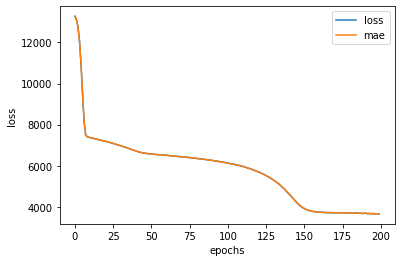

In [76]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

## Preprocessing data (Normalization and Standardization)

In [77]:
X

,age,bmi,children,male,smokes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,0,1
1,18,33.770,1,1,0,0,0,1,0
2,28,33.000,3,1,0,0,0,1,0
3,33,22.705,0,1,0,0,1,0,0
4,32,28.880,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,0,1,0,0
1334,18,31.920,0,0,0,1,0,0,0
1335,18,36.850,0,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,0,1


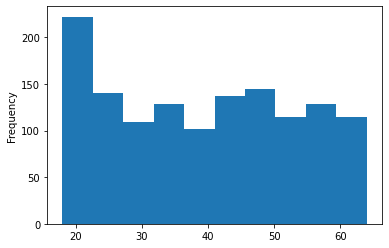

In [78]:
X['age'].plot(kind='hist')

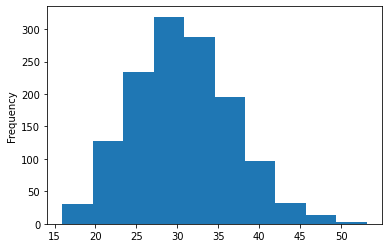

In [79]:
X['bmi'].plot(kind='hist')

In [85]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [86]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [87]:
X = insurance.drop('charges', axis=1)
y = insurance['charges']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [89]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [90]:
# Create column transformer
trans = ColumnTransformer(transformers=[
    ('scaling', MinMaxScaler(), ['age', 'bmi', 'children']),
    ('encoder', OneHotEncoder(handle_unknown='ignore'), ['region', 'sex', 'smoker'])
])

# Fit transformer on training data
trans.fit(X_train)

# Transform training and test data
X_train_normal = trans.transform(X_train)
X_test_normal = trans.transform(X_test)


In [92]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 1.        , 1.        ,
        0.        ]])

In [93]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

## Building The Model

In [94]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss='mae',
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics='mae')

insurance_model_4.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13342.8145 - mae: 13342.8145
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13334.0645 - mae: 13334.0645
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13313.4805 - mae: 13313.4805
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13270.6709 - mae: 13270.6709
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 13194.2451 - mae: 13194.2451
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 13072.8145 - mae: 13072.8145
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12896.0371 - mae: 12896.0371
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 12653.7812 - mae: 12653.7812
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 12335.8086 - mae: 12335.8086
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 11936.95

In [95]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3169.9648 - mae: 3169.9648


[3169.96484375, 3169.96484375]